<a href="https://colab.research.google.com/github/aryansaini25/datascienceproject/blob/main/complete_data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
file_path = 'fraudTrain.csv'
data = pd.read_csv(file_path)

# Step 1: Remove unnecessary columns
data = data.drop(columns=['Unnamed: 0'])

# Step 2: Check for missing values
missing_values = data.isnull().sum()

# Step 3: Standardize and format categorical data
# Convert all categorical columns to lowercase
categorical_columns = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.str.lower())

# Step 4: Date and time processing
# Ensure datetime columns are properly set BEFORE extracting components
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time']) # Convert to datetime first

# Now you can extract day, month, hour from 'trans_date_trans_time'
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_hour'] = data['trans_date_trans_time'].dt.hour

# Step 5: Data type adjustments
# Ensure datetime columns are properly set
data['dob'] = pd.to_datetime(data['dob'])

# Step 6: Check for duplicates
duplicate_rows = data.duplicated().sum()

# Step 7: Handle outliers (Example using IQR method)
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

# Handle outliers in 'amt' and 'city_pop'
data['amt'] = handle_outliers_iqr(data['amt'])
data['city_pop'] = handle_outliers_iqr(data['city_pop'])

# Output the cleaned data and summary of actions
cleaned_data = data.head()
summary = {
    'Missing Values': missing_values,
    'Duplicate Rows': duplicate_rows
}

summary, cleaned_data

({'Missing Values': trans_date_trans_time    0
  cc_num                   0
  merchant                 0
  category                 0
  amt                      0
  first                    0
  last                     0
  gender                   1
  street                   1
  city                     1
  state                    1
  zip                      1
  lat                      1
  long                     1
  city_pop                 1
  job                      1
  dob                      1
  trans_num                1
  unix_time                1
  merch_lat                1
  merch_long               1
  is_fraud                 1
  dtype: int64,
  'Duplicate Rows': 0},
   trans_date_trans_time            cc_num                            merchant  \
 0   2019-01-01 00:00:18  2703186189652095          fraud_rippin, kub and mann   
 1   2019-01-01 00:00:44      630423337322     fraud_heller, gutmann and zieme   
 2   2019-01-01 00:00:51    38859492057661                

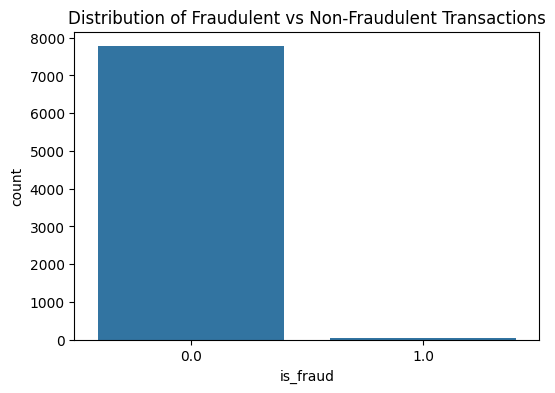

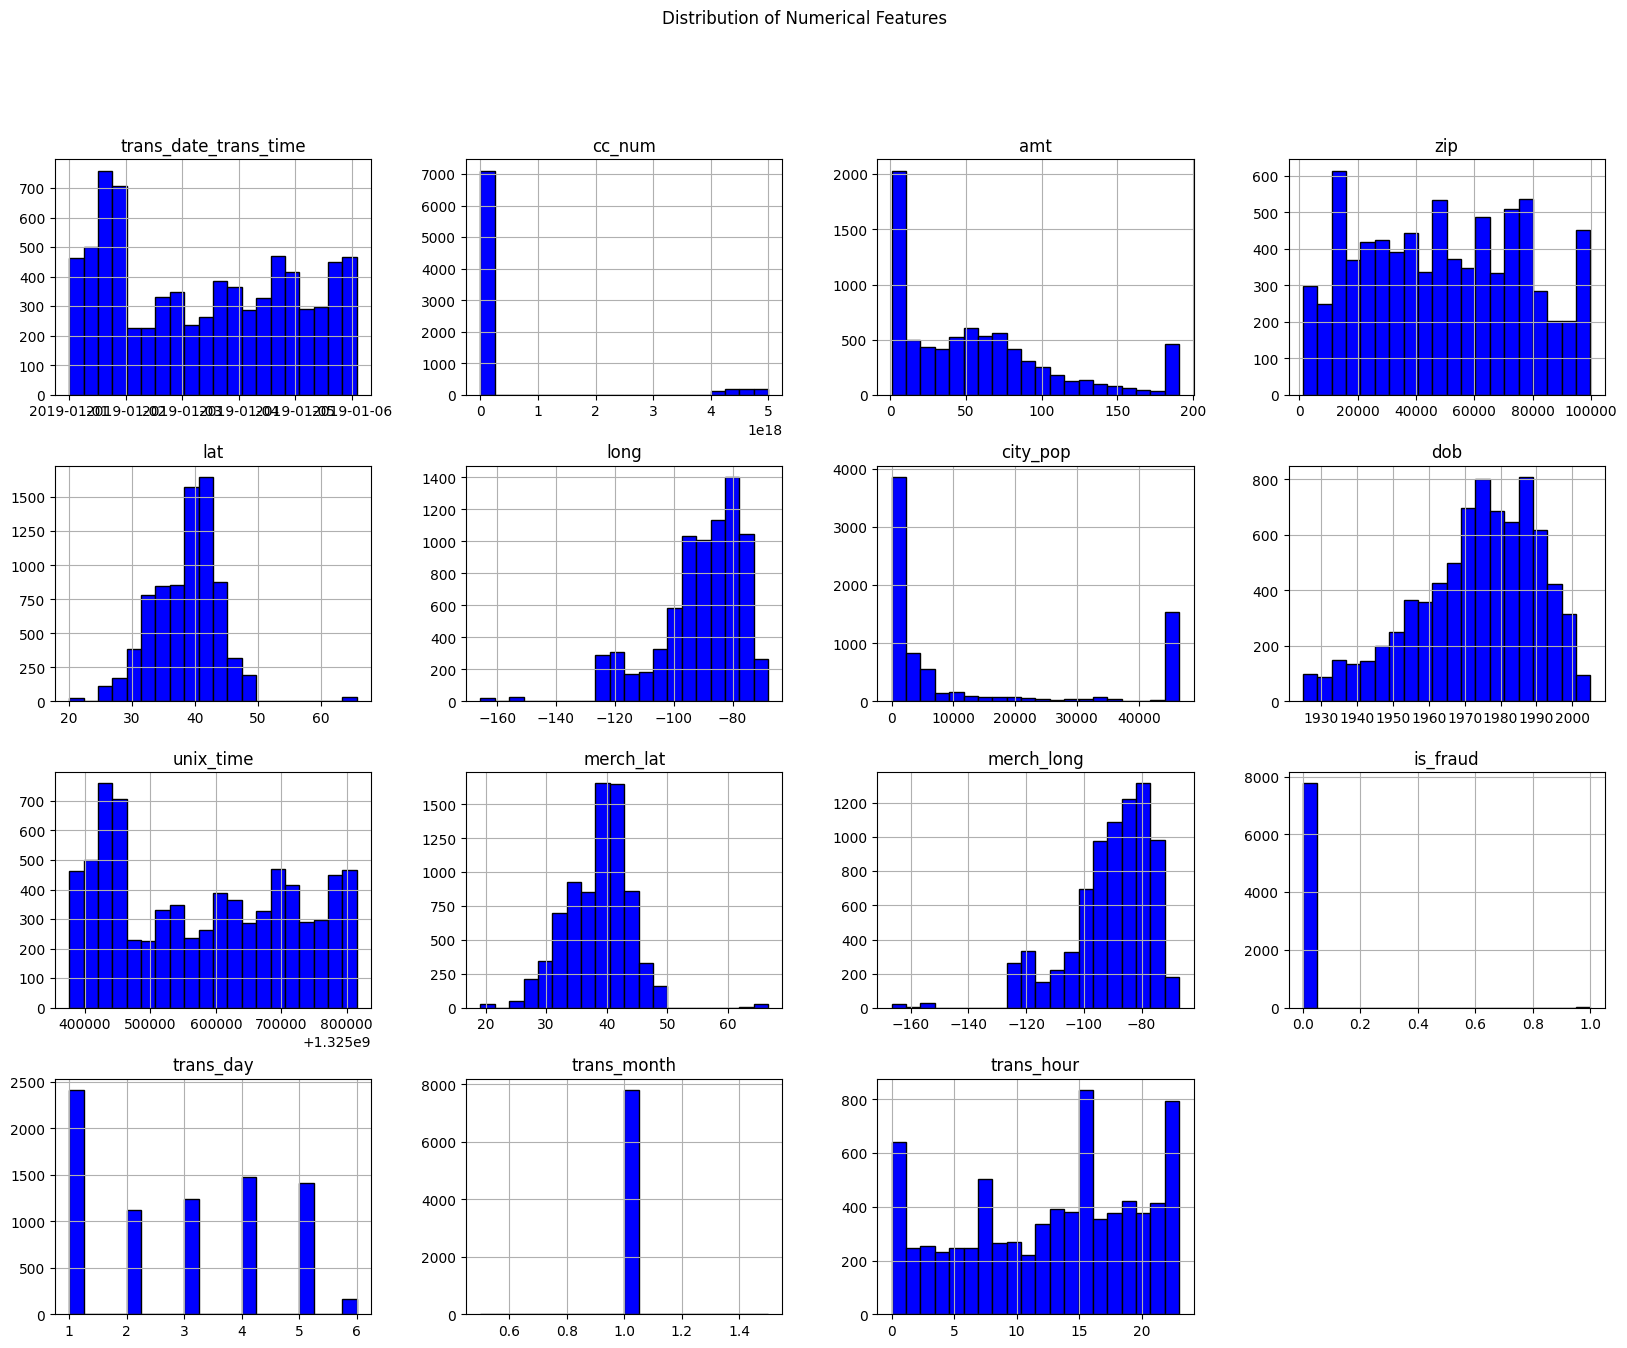

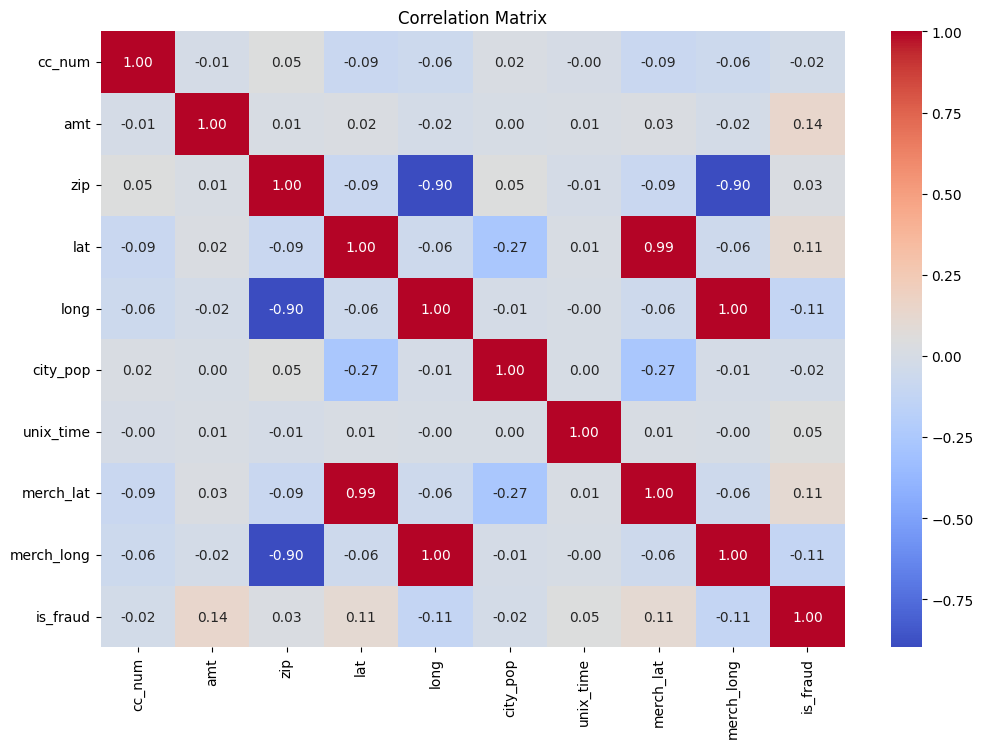

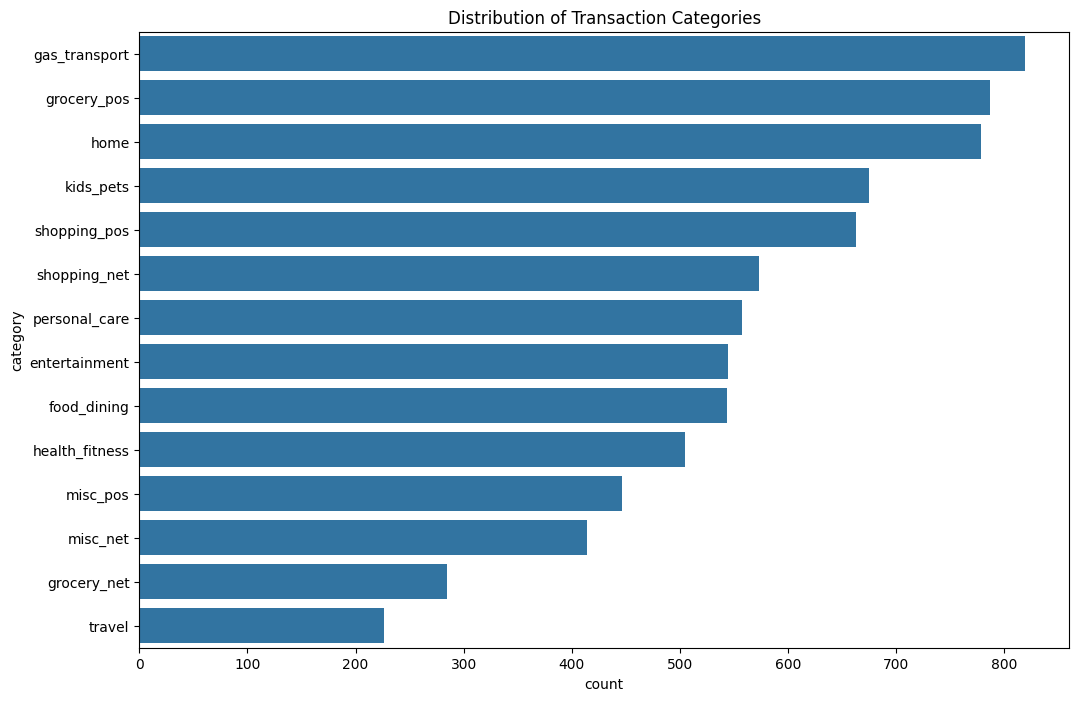

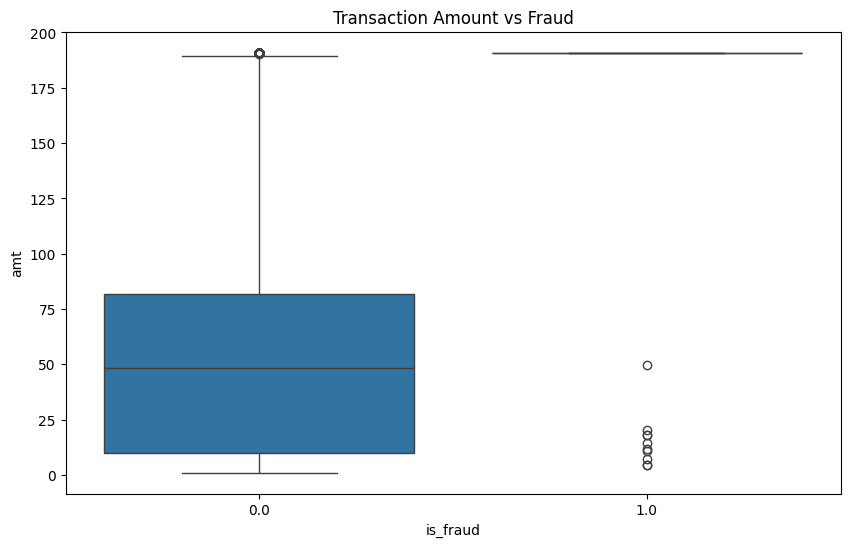

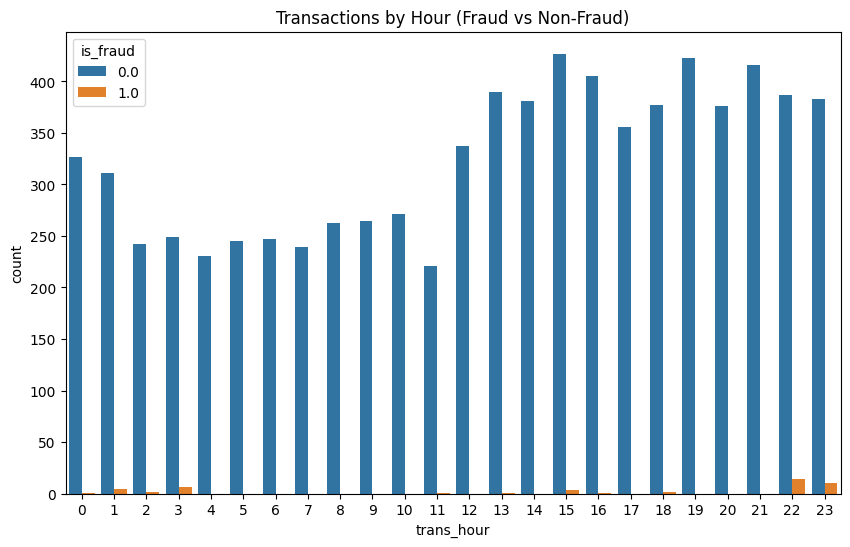

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_hour
count,7815,7.815000e+03,7815.000000,7814.000000,7814.000000,7814.000000,7814.000000,7814,7.814000e+03,7814.000000,7814.000000,7814.000000,7815.000000,7815.0,7815.000000
mean,2019-01-03 09:35:44.880998144,4.078117e+17,57.599731,49479.396340,38.595821,-90.688408,12806.786537,1973-02-07 02:30:33.631942656,1.325583e+09,38.599153,-90.685832,0.005759,2.851312,1.0,12.661548
min,2019-01-01 00:00:18,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,23.000000,1924-10-30 00:00:00,1.325376e+09,19.165823,-166.550779,0.000000,1.000000,1.0,0.000000
25%,2019-01-01 20:08:15.500000,1.800184e+14,9.785000,26041.000000,34.852700,-97.235100,741.000000,1962-03-19 00:00:00,1.325448e+09,34.913072,-97.322865,0.000000,1.000000,1.0,7.000000
50%,2019-01-03 09:29:38,3.518759e+15,48.490000,49259.000000,39.376400,-87.764400,2395.000000,1975-07-13 00:00:00,1.325583e+09,39.392224,-87.772889,0.000000,3.000000,1.0,14.000000
75%,2019-01-04 19:08:29,4.653879e+15,82.220000,72476.000000,41.846700,-80.143075,19054.000000,1986-05-02 00:00:00,1.325704e+09,41.923981,-80.187209,0.000000,4.000000,1.0,19.000000
max,2019-01-06 02:02:05,4.992346e+18,190.872500,99783.000000,65.689900,-67.950300,46523.500000,2005-01-29 00:00:00,1.325815e+09,66.645176,-66.967742,1.000000,6.000000,1.0,23.000000
std,NaN,1.295068e+18,52.228572,27184.827244,5.198199,14.512405,17995.174938,NaN,1.359720e+05,5.226026,14.532152,0.075673,1.567001,0.0,6.951529


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
summary_statistics = data.describe()

# Step 2: Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=data)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Step 3: Distribution of Numerical Variables
data.hist(bins=20, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Step 4: Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Step 5: Categorical Variable Analysis
plt.figure(figsize=(12, 8))
sns.countplot(y='category', data=data, order=data['category'].value_counts().index)
plt.title('Distribution of Transaction Categories')
plt.show()

# Step 6: Analyze Relationships between Features
# Example: Relationship between transaction amount and fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title('Transaction Amount vs Fraud')
plt.show()

# Step 7: Analyze the impact of time features
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_hour', hue='is_fraud', data=data)
plt.title('Transactions by Hour (Fraud vs Non-Fraud)')
plt.show()

# Output of basic summary
summary_statistics

In [ ]:
Feature engineering

import pandas as pd
# Feature Engineering

# 1. Creating Age from Date of Birth
# Assuming 'trans_date_trans_time' represents the transaction date
data['age'] = (data['trans_date_trans_time'] - data['dob']).dt.days // 365

# 2. Time Since Account Creation
# Assuming you have a column like 'account_created_date'
# data['time_since_account_creation'] = (data['trans_date_trans_time'] - data['account_created_date']).dt.days

# 3. Transaction Amount in Relation to Average Spending
# Calculate average spending per customer
avg_spending_per_customer = data.groupby('cc_num')['amt'].mean().to_dict()
data['relative_spending'] = data.apply(lambda row: row['amt'] / avg_spending_per_customer.get(row['cc_num'], row['amt']), axis=1)

# 4. Frequency of Transactions
# Calculate number of transactions per customer
transaction_frequency = data.groupby('cc_num')['trans_num'].count().to_dict()
data['transaction_frequency'] = data['cc_num'].map(transaction_frequency)

# 5. Day of the Week
data['trans_day_of_week'] = data['trans_date_trans_time'].dt.dayofweek  # Monday=0, Sunday=6

# 6. Weekend Flag
data['is_weekend'] = data['trans_day_of_week'].isin([5, 6]).astype(int)

# 7. Interaction Features (example)
data['amt_category_interaction'] = data['amt'] * data['category'].astype('category').cat.codes

# 8. Binning (example for 'amt')
data['amt_binned'] = pd.cut(data['amt'], bins=5, labels=False)

data.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_day,trans_month,trans_hour,age,relative_spending,transaction_frequency,trans_day_of_week,is_weekend,amt_category_interaction,amt_binned
0,2019-01-01 00:00:18,2703186189652095,"fraud_rippin, kub and mann",misc_net,4.9700,jennifer,banks,f,561 perry cove,moravian falls,...,1,1,0,30.0,0.082312,11,1,0,39.76,0
1,2019-01-01 00:00:44,630423337322,"fraud_heller, gutmann and zieme",grocery_pos,107.2300,stephanie,gill,f,43039 riley greens suite 393,orient,...,1,1,0,40.0,2.460939,33,1,0,428.92,2
2,2019-01-01 00:00:51,38859492057661,fraud_lind-buckridge,entertainment,190.8725,edward,sanchez,m,594 white dale suite 530,malad city,...,1,1,0,56.0,1.782547,5,1,0,0.00,4
3,2019-01-01 00:01:16,3534093764340240,"fraud_kutch, hermiston and farrell",gas_transport,45.0000,jeremy,white,m,9443 cynthia court apt. 038,boulder,...,1,1,0,52.0,2.934464,4,1,0,90.00,1
4,2019-01-01 00:03:06,375534208663984,fraud_keeling-crist,misc_pos,41.9600,tyler,garcia,m,408 bradley rest,doe hill,...,1,1,0,32.0,0.567410,8,1,0,377.64,1


In [ ]:
import pandas as pd
import numpy as np



# Step 1: Temporal Features
# Day of the week (0=Monday, 6=Sunday)
data['trans_day_of_week'] = data['trans_date_trans_time'].dt.dayofweek

# Weekend Indicator (1 if weekend, 0 if weekday)
data['trans_weekend'] = data['trans_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Step 2: Customer Age
# Calculate the age of the customer at the time of the transaction
data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year
data['age'] = data['age'] - ((data['trans_date_trans_time'].dt.month < data['dob'].dt.month) |
                              ((data['trans_date_trans_time'].dt.month == data['dob'].dt.month) &
                               (data['trans_date_trans_time'].dt.day < data['dob'].dt.day)))

# Step 3: Interaction Features
# Example: Interaction between transaction amount and hour of the transaction
data['amt_hour_interaction'] = data['amt'] * data['trans_hour']

# Step 4: Geographical Features
# Calculate distance between home location and transaction location
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

data['distance_from_home'] = haversine(data['lat'], data['long'], data['merch_lat'], data['merch_long'])

# Step 5: Categorical Encoding
# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=['category', 'gender', 'state'], drop_first=True)

# Output the head of the engineered dataset
data.head()


,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,zip,lat,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,2019-01-01 00:00:18,2703186189652095,"fraud_rippin, kub and mann",4.97,jennifer,banks,561 perry cove,moravian falls,28654.0,36.0788,...,False,False,False,False,False,False,False,False,False,False
1,2019-01-01 00:00:44,630423337322,"fraud_heller, gutmann and zieme",107.23,stephanie,gill,43039 riley greens suite 393,orient,99160.0,48.8878,...,False,False,False,False,False,False,True,False,False,False
2,2019-01-01 00:00:51,38859492057661,fraud_lind-buckridge,193.09,edward,sanchez,594 white dale suite 530,malad city,83252.0,42.1808,...,False,False,False,False,False,False,False,False,False,False
3,2019-01-01 00:01:16,3534093764340240,"fraud_kutch, hermiston and farrell",45.00,jeremy,white,9443 cynthia court apt. 038,boulder,59632.0,46.2306,...,False,False,False,False,False,False,False,False,False,False
4,2019-01-01 00:03:06,375534208663984,fraud_keeling-crist,41.96,tyler,garcia,408 bradley rest,doe hill,24433.0,38.4207,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# prompt: Model training
# use different different model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'is_fraud' is your target variable
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Handle NaNs in the target variable 'y' before splitting
# Option 1: Drop rows with NaNs in 'y'
y = y.dropna()
X = X.loc[y.index]  # Align X with the dropped rows in y



# Split data into train and test sets AFTER handling NaNs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Impute missing categorical values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipelines for different models
pipelines = {
    'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', LogisticRegression(max_iter=1000))]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', RandomForestClassifier())]),
    'Support Vector Machine': Pipeline(steps=[('preprocessor', preprocessor),
                                              ('classifier', SVC())])
}

# Train and evaluate each model
for model_name, pipeline in pipelines.items():
    print(f"Training {model_name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report for {model_name}:\n {classification_report(y_test, y_pred)}")
    print("-" * 30)

Training Logistic Regression...
Accuracy for Logistic Regression: 0.9968010236724248
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1550
         1.0       0.90      0.69      0.78        13

    accuracy                           1.00      1563
   macro avg       0.95      0.85      0.89      1563
weighted avg       1.00      1.00      1.00      1563

------------------------------
Training Random Forest...
Accuracy for Random Forest: 0.9974408189379399
Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1550
         1.0       0.91      0.77      0.83        13

    accuracy                           1.00      1563
   macro avg       0.95      0.88      0.92      1563
weighted avg       1.00      1.00      1.00      1563

------------------------------
Training Support Vector Machine...
A

In [ ]:
# Train and evaluate each model, focusing on recall
for model_name, pipeline in pipelines.items():
    print(f"Training {model_name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    # Accessing recall for class '1.0' instead of '1'
    recall_fraud = report['1.0']['recall']  # Extract recall for class 1.0 (fraud)

    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred)}")
    print(f"Recall for Fraud (Class 1) for {model_name}: {recall_fraud}")
    print("-" * 30)

Training Logistic Regression...
Accuracy for Logistic Regression: 0.9968010236724248
Recall for Fraud (Class 1) for Logistic Regression: 0.6923076923076923
------------------------------
Training Random Forest...
Accuracy for Random Forest: 0.9974408189379399
Recall for Fraud (Class 1) for Random Forest: 0.7692307692307693
------------------------------
Training Support Vector Machine...
Accuracy for Support Vector Machine: 0.9974408189379399
Recall for Fraud (Class 1) for Support Vector Machine: 0.7692307692307693
------------------------------


In [ ]:
# prompt: testing use fraudtest.csv

import pandas as pd
# Load the test data
test_data = pd.read_csv('fraudTest.csv')

# Preprocess the test data in the same way as the training data
# --- START OF PREPROCESSING ---
# (Copy the exact same preprocessing steps you used for the training data here)
# Example:
test_data['trans_day_of_week'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.dayofweek
test_data['is_weekend'] = test_data['trans_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Assuming you have calculated 'dob' in the same way as in training data
test_data['age'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.year - pd.to_datetime(test_data['dob']).dt.year
test_data['age'] = test_data['age'] - ((pd.to_datetime(test_data['trans_date_trans_time']).dt.month < pd.to_datetime(test_data['dob']).dt.month) |
                              ((pd.to_datetime(test_data['trans_date_trans_time']).dt.month == pd.to_datetime(test_data['dob']).dt.month) &
                               (pd.to_datetime(test_data['trans_date_trans_time']).dt.day < pd.to_datetime(test_data['dob']).dt.day)))

# Extract 'trans_hour' from 'trans_date_trans_time' if it's not present
if 'trans_hour' not in test_data.columns:
    test_data['trans_hour'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.hour

test_data['amt_category_interaction'] = test_data['amt'] * test_data['trans_hour']

# Handle missing columns: Add the missing columns to the test data and fill with appropriate values
# Option 1: Fill with a default value (e.g., 0)
test_data['relative_spending'] = 0
test_data['transaction_frequency'] = 0
test_data['amt_binned'] = 0


#  'is_fraud' is your target variable in the test data as well
X_test_new = test_data.drop('is_fraud', axis=1)
y_test_new = test_data['is_fraud']

# Select the Random Forest pipeline
random_forest_pipeline = pipelines['Random Forest']

# Evaluate the Random Forest model on the new test data
y_pred_new = random_forest_pipeline.predict(X_test_new)

report = classification_report(y_test_new, y_pred_new, output_dict=True)
# Accessing recall for class '1.0' if it exists, otherwise for '1'
recall_fraud = report.get('1.0', report.get('1'))['recall']  # Handle potential key difference

print(f"Accuracy for Random Forest on new test data: {accuracy_score(y_test_new, y_pred_new)}")
print(f"Recall for Fraud (Class 1) for Random Forest on new test data: {recall_fraud}")
print("-" * 30)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for Random Forest on new test data: 0.9961401355721147
Recall for Fraud (Class 1) for Random Forest on new test data: 0.0
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#  we have imbalanced data, try to implement some techniques for resampling

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Resampling Techniques

# 1. Oversampling using SMOTE
# Create a pipeline with SMOTE and your chosen classifier
smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier())
])

# Train and evaluate the pipeline
smote_pipeline.fit(X_train, y_train)
y_pred_smote = smote_pipeline.predict(X_test)

print("SMOTE Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_smote)}")

# 2. Undersampling using RandomUnderSampler
undersample_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier())
])

undersample_pipeline.fit(X_train, y_train)
y_pred_undersample = undersample_pipeline.predict(X_test)

print("\nUndersampling Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_undersample)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_undersample)}")

# 3. Combination of SMOTE and Undersampling
# You can combine oversampling and undersampling techniques in a pipeline
combined_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Oversample to a certain ratio
    ('undersample', RandomUnderSampler(sampling_strategy=0.8, random_state=42)),  # Then undersample
    ('classifier', RandomForestClassifier())
])

combined_pipeline.fit(X_train, y_train)
y_pred_combined = combined_pipeline.predict(X_test)

print("\nCombined SMOTE and Undersampling Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_combined)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_combined)}")


SMOTE Results:
Accuracy: 0.9987204094689699
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1550
         1.0       0.87      1.00      0.93        13

    accuracy                           1.00      1563
   macro avg       0.93      1.00      0.96      1563
weighted avg       1.00      1.00      1.00      1563


Undersampling Results:
Accuracy: 0.9795265515035189
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1550
         1.0       0.29      1.00      0.45        13

    accuracy                           0.98      1563
   macro avg       0.64      0.99      0.72      1563
weighted avg       0.99      0.98      0.99      1563


Combined SMOTE and Undersampling Results:
Accuracy: 0.9974408189379399
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1

In [ ]:
# prompt: Apply different models like 2 or 3 and come up with best model with hyper parameter tuning

from sklearn.model_selection import GridSearchCV

# Define models and their hyperparameter grids
models = {
    'Random Forest': (RandomForestClassifier(), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }),
    'Support Vector Machine': (SVC(), {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    })
}

# Perform grid search for each model
best_models = {}
for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')  # Using recall as the scoring metric
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best recall score for {model_name}: {grid_search.best_score_}")

# Evaluate the best models on the test set
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    print(f"\nEvaluation of best {model_name} on test set:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n {classification_report(y_test, y_pred)}")


Tuning Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best recall score for Random Forest: 0.7523809523809525
Tuning Support Vector Machine...
Best parameters for Support Vector Machine: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Best recall score for Support Vector Machine: 0.819047619047619

Evaluation of best Random Forest on test set:
Accuracy: 0.9974408189379399
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1550
         1.0       0.91      0.77      0.83        13

    accuracy                           1.00      1563
   macro avg       0.95      0.88      0.92      1563
weighted avg       1.00      1.00      1.00      1563


Evaluation of best Support Vector Machine on test set:
Accuracy: 0.999360204734485
Classification Report:
               precision    recall  f1-score   support

   

In [ ]:
#  now take random value and check it is fraud transtion or not

import numpy as np
# Choose a random row from the test set
random_index = np.random.randint(0, X_test.shape[0])
random_sample = X_test.iloc[[random_index]]

# Use the best Random Forest model to predict
best_rf_model = best_models['Random Forest']
prediction = best_rf_model.predict(random_sample)

if prediction[0] == 1:
  print("The model predicts this transaction is likely FRAUDULENT.")
else:
  print("The model predicts this transaction is likely NOT fraudulent.")


The model predicts this transaction is likely NOT fraudulent.
